# 18.369 pset 4 solutions

Solutions for the MPB calculations in pset 4, in the form of a Jupyter notebook. 

In [1]:
# do inline plots with Python's matplotlib library
from matplotlib import pyplot as plt
import numpy as np
import math

# load the Meep and MPB modules in Python
import meep as mp
from meep import mpb

## Problem 2: Band gaps in MPB

The following code computes and plots the band diagram of a 1d-periodic structure, consisting of layers of two materials $\varepsilon_1 = 12$ and $\varepsilon_2 = 1$ with thicknesses $d_1$ and $d_2 = a - d_1$, respectively.

In 1d, both polarizations are equivalent, so we compute the "TM" ($E_z$ polarization) band structure only.  The following code computes it for $d_1 = 0.4a$, where we have a period $a=1$:

In [2]:
eps1 = 12
eps2 = 1
d1 = 0.4
d2 = 1 - d1

ms = mpb.ModeSolver(                    
                    # unit cell is just size 1 in x direction (and zero size in y and z).
                    geometry_lattice=mp.Lattice(size=(1,0,0)),
                    
                    # we could define the unit cell by two objects (eps1 and eps2), but it
                    # is easier just to set the default material to eps2 and then add one
                    # object for eps1.
                    geometry=[mp.Block(center=(0,0,0), size=(d1,mp.inf,mp.inf),
                                       material=mp.Medium(epsilon=eps1))],
                    default_material=mp.Medium(epsilon=eps2),
    
                    # Let's set up the k points we want to compute.  Actually, to get the
                    # band gap we really only need k = pi/a, but we'll compute a range
                    # of k's in the irreducible Brillouin zone just so that we can make
                    # nice plots if we want.  Note that k is in units of 2pi/a, so, k=pi/a
                    # is just given as k=0.5.
                    k_points=mp.interpolate(9, [mp.Vector3(0), mp.Vector3(0.5)]),
                    
                    resolution=32, # this is plenty for the first few bands
                    num_bands=5 # the number of bands to compute (you may want more or less)
                    )

ms.run_tm() # TM and TE are equivalent in 1d, so we'll just do TM

Initializing eigensolver data
Computing 5 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 5 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.4,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.0>
  Ve

### part (a)

Now, we compute the (fractional) gap size as a function of $d_1$.  We'll use a loop to compute the gap sizes for a bunch of $d_1$ values from $d_1 = 0$ to $d_1 = 1$, where of course the gap size should be zero at the endpoints.

In [3]:
# 20 points in [0,1)
d1s = np.linspace(0,1,20,endpoint=False) 

ms.num_bands = 2 # we only need 2 bands for the gap

gaps = []
for d1 in d1s:
    ms.geometry=[mp.Block(center=(0,0,0), size=(d1,mp.inf,mp.inf),
                          material=mp.Medium(epsilon=eps1))]
    ms.run_tm()
    gap_bottom = ms.all_freqs[-1,0]  
    gap_top =    ms.all_freqs[-1,1]
    gap = 100 * (gap_top - gap_bottom) / (0.5 * (gap_top + gap_bottom))
    gaps = gaps + [gap]

gaps # the percentage gaps

Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.0>
  Vect

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2
Solving for bands 2 to 2...
Finished solving for bands 2 to 2 after 7 iterations.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.666853
elapsed time for k point: 0.01069498062133789
solve_kpoint (0.05,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 2, 0.05, 0, 0, 0.05, 0.0344716, 0.662419
elapsed time for k point: 0.004437923431396484
solve_kpoint (0.1,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 3, 0.1, 0, 0, 0.1, 0.0687474, 0.649953
elapsed time for k point: 0.005484104156494141
solve_kpoint (0.15,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 4, 0.15, 0, 0, 0.15, 0.102602, 0.631408
elapsed time for k point: 0.00432586669921875
solve_kpoint (0.2,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 5, 0.2, 0, 0, 0.2, 0.135744, 0.608911
elapsed t

Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 5, 0.2, 0, 0, 0.2, 0.109346, 0.55744
elapsed time for k point: 0.005362749099731445
solve_kpoint (0.25,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 6, 0.25, 0, 0, 0.25, 0.134639, 0.532553
elapsed time for k point: 0.004431247711181641
solve_kpoint (0.3,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 7, 0.3, 0, 0, 0.3, 0.158132, 0.509301
elapsed time for k point: 0.003142118453979492
solve_kpoint (0.35,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 8, 0.35, 0, 0, 0.35, 0.17892, 0.48866
elapsed time for k point: 0.005768775939941406
solve_kpoint (0.4,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 9, 0.4, 0, 0, 0.4, 0.195712, 0.471955
elapsed time for k point: 0.007333040237426758
solve_kpoint (0.

Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 9, 0.4, 0, 0, 0.4, 0.169573, 0.396995
elapsed time for k point: 0.0031533241271972656
solve_kpoint (0.45,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 10, 0.45, 0, 0, 0.45, 0.179395, 0.3875
elapsed time for k point: 0.0053369998931884766
solve_kpoint (0.5,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 11, 0.5, 0, 0, 0.5, 0.182882, 0.384119
elapsed time for k point: 0.003900289535522461
Band 1 range: 0.0 at Vector3<0.0, 0.0, 0.0> to 0.1828818310198117 at Vector3<0.5, 0.0, 0.0>
Band 2 range: 0.38411854495825093 at Vector3<0.5, 0.0, 0.0> to 0.5214259886832349 at Vector3<0.0, 0.0, 0.0>
Gap from band 1 (0.1828818310198117) to band 2 (0.38411854495825093), 70.98292081069981%
total elapsed time for run: 0.06821799278259277
done
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid siz

Grid size is 32 x 1 x 1.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.45,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.01616835594177246
solve_kpoint (0,0,0):
tmfreqs:, k index,

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2
Solving for bands 2 to 2...
Finished solving for bands 2 to 2 after 11 iterations.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.345917
elapsed time for k point: 0.008095026016235352
solve_kpoint (0.05,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 2, 0.05, 0, 0, 0.05, 0.0188195, 0.343413
elapsed time for k point: 0.004124879837036133
solve_kpoint (0.1,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 3, 0.1, 0, 0, 0.1, 0.0375675, 0.336395
elapsed time for k point: 0.004962921142578125
solve_kpoint (0.15,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 4, 0.15, 0, 0, 0.15, 0.0561609, 0.325976
elapsed time for k point: 0.004363059997558594
solve_kpoint (0.2,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 5, 0.2, 0, 0, 0.2, 0.0744896, 0.313316
elap

Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 5 iterations.
tmfreqs:, 5, 0.2, 0, 0, 0.2, 0.0695613, 0.283331
elapsed time for k point: 0.005007028579711914
solve_kpoint (0.25,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 6, 0.25, 0, 0, 0.25, 0.0865181, 0.269396
elapsed time for k point: 0.004579067230224609
solve_kpoint (0.3,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 7, 0.3, 0, 0, 0.3, 0.103044, 0.254954
elapsed time for k point: 0.004036903381347656
solve_kpoint (0.35,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 8, 0.35, 0, 0, 0.35, 0.118805, 0.240615
elapsed time for k point: 0.005359172821044922
solve_kpoint (0.4,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 9, 0.4, 0, 0, 0.4, 0.133077, 0.227268
elapsed time for k point: 0.0043718814849853516
solve_kpoi

Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 9, 0.4, 0, 0, 0.4, 0.127858, 0.204941
elapsed time for k point: 0.004480838775634766
solve_kpoint (0.45,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 10, 0.45, 0, 0, 0.45, 0.140283, 0.19282
elapsed time for k point: 0.0036292076110839844
solve_kpoint (0.5,0,0):
Solving for bands 1 to 2...
Finished solving for bands 1 to 2 after 4 iterations.
tmfreqs:, 11, 0.5, 0, 0, 0.5, 0.146003, 0.187199
elapsed time for k point: 0.0053560733795166016
Band 1 range: 0.0 at Vector3<0.0, 0.0, 0.0> to 0.14600251304651576 at Vector3<0.5, 0.0, 0.0>
Band 2 range: 0.18719865230765992 at Vector3<0.5, 0.0, 0.0> to 0.30023294753569 at Vector3<0.0, 0.0, 0.0>
Gap from band 1 (0.14600251304651576) to band 2 (0.18719865230765992), 24.727488103083182%
total elapsed time for run: 0.07463908195495605
done
Initializing eigensolver data
Computing 2 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid s

Grid size is 32 x 1 x 1.
Solving for 2 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.9,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.0>
  Vector3<0.5, 0.0, 0.0>
elapsed time for initialization: 0.02042698860168457
solve_kpoint (0,0,0):
tmfreqs:, k index, 

[4.440892098500625e-14,
 38.96419453555149,
 58.92278982162486,
 69.50141535357452,
 73.71493672660522,
 73.67582230993152,
 70.98292081069981,
 66.8790782251821,
 61.914480983921635,
 56.58883313887143,
 51.2407808525403,
 45.91008751932011,
 40.61103353387029,
 35.27835806009738,
 29.9587931796112,
 24.727488103083182,
 19.579511127196184,
 14.51669380627236,
 9.528999283774093,
 4.671993271811192]

Now that we have computed the gaps, we can plot them vs. $d_1$, and we can see that the peak gap indeed occurs at the quarter-wave thickness
$$
d_1^{\mathrm{(qw)}} = \frac{\sqrt{\varepsilon_2}}{\sqrt{\varepsilon_1} + \sqrt{\varepsilon_2}}
$$
from the book and class:

Text(0.5, 1.0, 'problem 2a solution')

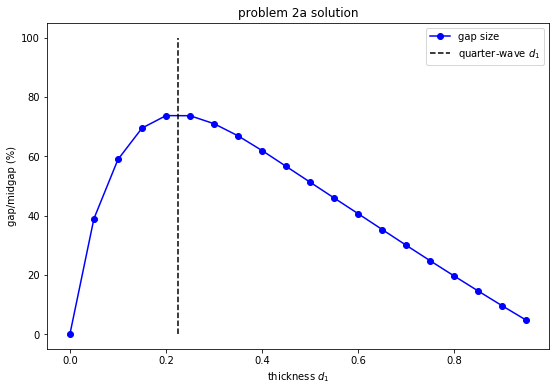

In [4]:
plt.figure(figsize=(9,6))
plt.plot(d1s, gaps, "bo-")

d1qw = math.sqrt(eps2) / (math.sqrt(eps1) + math.sqrt(eps2))
plt.plot([d1qw, d1qw], [0, 100], "k--")
plt.xlabel("thickness $d_1$")
plt.ylabel("gap/midgap (%)")
plt.legend(["gap size", "quarter-wave $d_1$"])
plt.title("problem 2a solution")

### part (b)

Plot the 1d TM band diagram for this structure, with $d_{1}$ given by the quarter wave thickness, showing the first five gaps. Also compute it for $d_{1}=0.12345$ (which I just chose randomly), and superimpose the two plots (plot the quarter-wave bands as solid lines and the other bands as dashed). What special features does the quarter-wave band diagram have?

In [5]:
ms.num_bands = 10 # 10 bands for first 5 gaps

# quarter-wave d1 from above:
ms.geometry=[mp.Block(center=(0,0,0), size=(d1qw,mp.inf,mp.inf),
                      material=mp.Medium(epsilon=eps1))]
ms.run_tm()
freqs_qw = ms.all_freqs    # save the computed frequencies

# d1 = 0.12345
ms.geometry=[mp.Block(center=(0,0,0), size=(0.12345,mp.inf,mp.inf),
                      material=mp.Medium(epsilon=eps1))]
ms.run_tm()
freqs_12345 = ms.all_freqs # save the computed frequencies

Initializing eigensolver data
Computing 10 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 32 x 1 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (1, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 1
Reciprocal lattice vectors (/ 2 pi):
     (1, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (0,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 1 and 1 object nodes (vs. 1 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
11 k-points
  Vector3<0.0, 0.0, 0.0>
  Vector3<0.05, 0.0, 0.0>
  Vector3<0.1, 0.0, 0.0>
  Vector3<0.15000000000000002, 0.0, 0.0>
  Vector3<0.2, 0.0, 0.0>
  Vector3<0.25, 0.0, 0.0>
  Vector3<0.30000000000000004, 0.0, 0.0>
  Vector3<0.35000000000000003, 0.0, 0.0>
  Vector3<0.4, 0.0, 0.0>
  Vector3<0.45, 0.0, 0.

Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 7 iterations.
tmfreqs:, 4, 0.15, 0, 0, 0.15, 0.0967189, 0.62024, 0.935875, 1.36956, 1.66577, 2.18415, 2.39191, 2.92173, 3.14548, 3.65343
elapsed time for k point: 0.01198577880859375
solve_kpoint (0.2,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tmfreqs:, 5, 0.2, 0, 0, 0.2, 0.127836, 0.597567, 0.961315, 1.34229, 1.69143, 2.15075, 2.42636, 2.88796, 3.17976, 3.62102
elapsed time for k point: 0.011582136154174805
solve_kpoint (0.25,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tmfreqs:, 6, 0.25, 0, 0, 0.25, 0.157764, 0.573311, 0.98966, 1.3125, 1.71874, 2.1183, 2.46031, 2.85432, 3.21418, 3.58802
elapsed time for k point: 0.011631011962890625
solve_kpoint (0.3,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 6 iterations.
tmfreqs:, 7, 0.3, 0, 0, 0.3, 0.185846, 0.549069, 1.01989, 1.28118, 1.74621, 2.08735, 2.

Now, we plot the bands for the two values of $d_1$.   If we look *very* carefully, we can notice *three* special things about the quarter-wave bands:

* There are no gaps at $k=0$, where an *accidental degeneracy* occurs for the quarter-wave structure.  (The $d_1 = 0.12345a$ structure *almost* has an accidental degeneracy at $k = pi/a$ between its third and fourth bands, but there is actually a very small gap there.)
* The quarter-wave gaps $\Delta\omega$ (opening at $k=\pi/a$) are all exactly the same size (in absolute units, not as a fraction of mid-gap).
* The quarter-wave mid-gap frequencies are spaced exactly at the *odd-integer multiples* of the first mid-gap $\omega$!  (The gaps are equally spaced in $\omega$.)

(0, 0.5)

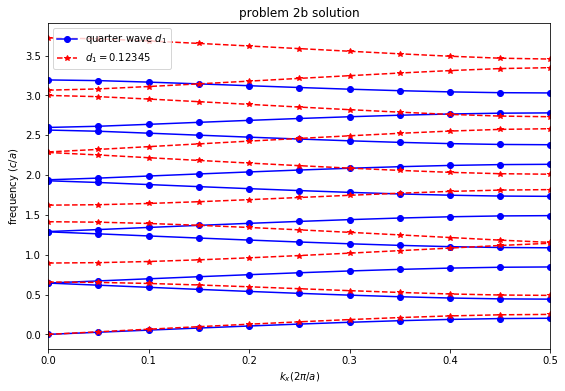

In [6]:
kx_qw = [k.x for k in ms.k_points] # get a list of the kx values
plt.figure(figsize=(9,6))
plt.plot(kx_qw, freqs_qw, "bo-")[0].set_label("quarter wave $d_1$")
plt.plot(kx_qw, freqs_12345, "r*--")[0].set_label("$d_1=0.12345$")
plt.title("problem 2b solution")
plt.xlabel("$k_x (2\pi/a)$")
plt.ylabel("frequency $(c/a)$")
plt.legend()
plt.xlim(0,0.5)

## Problem 3: Defect modes in MPB

Here, you will create a ($E_z$/TM-polarized) "defect" mode by increasing the dielectric constant of a single layer by $\Delta\varepsilon$, pulling an eigenvalue down into the gap. The periodic structure will be the same as the one from the problem above, with the quarter-wave thickness $d_{1}=1/(1+\sqrt{12})$.

To model a defect in MPB, we have to use a "supercell" with N copies of the unit cell, where one of the copies has been changed.  This also means that we need to compute N times as many bands, because of the "band folding" (the reduction of the Brillouin zone).

For convenience, we'll define a function `supercell1(N, deps1)` Python function that sets up our `ModeSolver` object for a given N and $\Delta\varepsilon_1$:

In [7]:
# define a function to create a supercell in the eps1 layer, with some default parameters:
def supercell1(N=15, deps1=0, eps1=12, eps2=1):
    d1 = math.sqrt(eps2) / (math.sqrt(eps1) + math.sqrt(eps2)) # quarter-wave thickness
    d2 = 1 - d1
    return mpb.ModeSolver(                    
        # unit cell a supercell: size N in x direction (and zero size in y and z).
        geometry_lattice=mp.Lattice(size=(N,0,0)),

        # To create the supercell geometry, we have to repeat the eps1 block N times,
        # and we can do this using the geometric_objects_lattice_duplicates function.
        # 
        # To create the defect, we'll simply append
        # a new object with eps1 + deps1 at the end of the geometry list
        # -- note that later objects take precedence over earlier objects,
        #    so by putting it at the end we ensure that the defect "overwrites"
        #    the whatever was previously there.
        geometry=mp.geometric_objects_lattice_duplicates(
                    mp.Lattice(size=(N,0,0)),
                    [mp.Block(center=(0,0,0), size=(d1,mp.inf,mp.inf),
                              material=mp.Medium(epsilon=eps1))]) +
                 [mp.Block(center=(0,0,0), size=(d1,mp.inf,mp.inf),
                           material=mp.Medium(epsilon=eps1+deps1))],
        
        default_material=mp.Medium(epsilon=eps2),

        # for computing a defect mode, k doesn't matter (if N is big enough),
        # so we'll just set k = 0
        k_points=[mp.Vector3(0)],

        resolution=32, # this is plenty for the first few bands
        
        # because of the folding, the first band (before the gap) will be folded
        # N times.  So, we need to compute N bands plus some extra bands to
        # get whatever defect states lie in the gap.  We'll just use 1 extra band,
        # but you'll need to increase this to see higher-order defect modes.
        num_bands=N+1
        )

## part (a)

When there is no defect ($\Delta\varepsilon = 0$), plot out the band diagram $\omega(k)$ for the $N=5$ supercell, and show that it corresponds to the band diagram of problem 2 “folded” as expected.

You'll want to change `N` to `5`, and also change the k points to an array:

In [8]:
sc = supercell1(N=5, deps1=0)

# Compute the band structure for an array of k points.  Note that the k points
# are in units of the reciprical lattice, so kx=0.5 is still the edge of the 
# Brillouin zone (but is not the same kx=pi/a!).
sc.k_points = mp.interpolate(19, [mp.Vector3(0), mp.Vector3(0.5)])

# compute some more bands so that we get a clear picture of what is going on
sc.num_bands = 20

sc.run_tm()

Initializing eigensolver data
Computing 20 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 160 x 1 x 1.
Solving for 10 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (5, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 5
Reciprocal lattice vectors (/ 2 pi):
     (0.2, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (2,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-1,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-2,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.224009,1e+20,1e+20)
          ax

tmfreqs:, 12, 0.275, 0, 0, 0.055, 0.0295055, 0.0770383, 0.131676, 0.169925, 0.199176, 0.445219, 0.47447, 0.51272, 0.567358, 0.61489, 0.673898, 0.721422, 0.776038, 0.814257, 0.843467, 1.09011, 1.11932, 1.15753, 1.21213, 1.25962
elapsed time for k point: 0.0290219783782959
solve_kpoint (0.3,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 3 iterations.
Solving for bands 11 to 20...
Finished solving for bands 11 to 20 after 3 iterations.
Finished k-point with 3 mean iterations/band.
tmfreqs:, 13, 0.3, 0, 0, 0.06, 0.0321784, 0.0744416, 0.134001, 0.168048, 0.199811, 0.444584, 0.476347, 0.510395, 0.569955, 0.612217, 0.676571, 0.718826, 0.778362, 0.812381, 0.8441, 1.08947, 1.12119, 1.15521, 1.21473, 1.25695
elapsed time for k point: 0.025817155838012695
solve_kpoint (0.325,0,0):
Solving for bands 1 to 10...
Finished solving for bands 1 to 10 after 3 iterations.
Solving for bands 11 to 20...
Finished solving for bands 11 to 20 after 3 iterations.
Finished k-point wit

Here, we plot the "folded" bands of the supercell and superimpose the "unfolded" bands of the unit cell computed above.

A key point to be careful of is that the units of $k$ are different in the two cases, because MPB's $k$ is in **units of the reciprocal lattice vectors**.  For the unit cell, $k$ is in units of $2\pi/a$ where $a$ is the period, but for the supercell $k$ is in units of $2\pi/Na$.  So, to put them on the same plot we need to **divide the supercell** $k$ values by $N=5$:

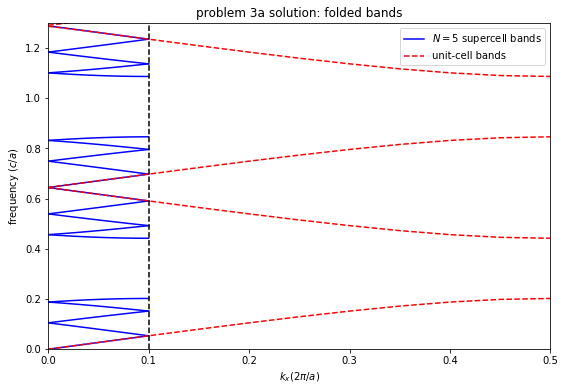

In [9]:
kx = [k.x/5 for k in sc.k_points]
freqs = sc.all_freqs

plt.figure(figsize=(9,6))
plt.plot(kx, freqs, "b-")[0].set_label("$N=5$ supercell bands")
plt.title("problem 3a solution: folded bands")
plt.xlabel("$k_x (2\pi/a)$")
plt.ylabel("frequency $(c/a)$")
plt.xlim(0,0.5)
plt.ylim(0,1.3)
plt.plot([0.1, 0.1], [0, 2], "k--")

plt.plot(kx_qw, freqs_qw, "r--")[0].set_label("unit-cell bands")
plt.legend()

Plotted in this way, it is pretty clear that the supercell (blue) bands are simply the unit cell (dashed red) bands "folded" into the smaller Brillouin zone of the supercell.

### part (b)

Create a defect mode (a mode that lies in the band gap of the periodic structure) by increasing the $\varepsilon$ of a single $\varepsilon_{1}$ layer by $\Delta\varepsilon=1$, and plot the $E_{z}$ field pattern. Do the same thing by increasing a single $\varepsilon_{2}$ layer. Which mode is even/odd around the mirror plane of the defect? Why?

For the $\Delta\varepsilon_1$ layer, we can use our `supercell1` function from above:

In [10]:
N = 100

sc = supercell1(N=N, deps1=1)
sc.run_tm(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 101 bands with 1e-07 tolerance
Working in 1 dimensions.
Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.224009,1e+20,1e+20)
 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-22,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.224009,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.224009,1e+20,1e+20)
          

Fixing e-field (band 19) phase by -0.424717 + -0.905326i; max ampl. = 0.0763656
Fixing e-field (band 20) phase by 0.768237 + -0.640166i; max ampl. = 0.0764321
Fixing e-field (band 21) phase by 0.18747 + 0.98227i; max ampl. = 0.0743419
Fixing e-field (band 22) phase by -0.414437 + 0.910078i; max ampl. = 0.0765326
Fixing e-field (band 23) phase by -0.0572493 + -0.99836i; max ampl. = 0.0765725
Fixing e-field (band 24) phase by -0.972381 + 0.233401i; max ampl. = 0.0766641
Fixing e-field (band 25) phase by 0.942289 + -0.3348i; max ampl. = 0.0765825
Fixing e-field (band 26) phase by -0.85704 + -0.51525i; max ampl. = 0.0767509
Fixing e-field (band 27) phase by -0.722259 + -0.691623i; max ampl. = 0.0767847
Fixing e-field (band 28) phase by 0.396483 + -0.918042i; max ampl. = 0.0768923
Fixing e-field (band 29) phase by -0.0375074 + -0.999296i; max ampl. = 0.0768009
Fixing e-field (band 30) phase by 0.242973 + 0.970033i; max ampl. = 0.0770343
Fixing e-field (band 31) phase by -0.417719 + 0.908576

Text(0.5, 0, '$x (a)$')

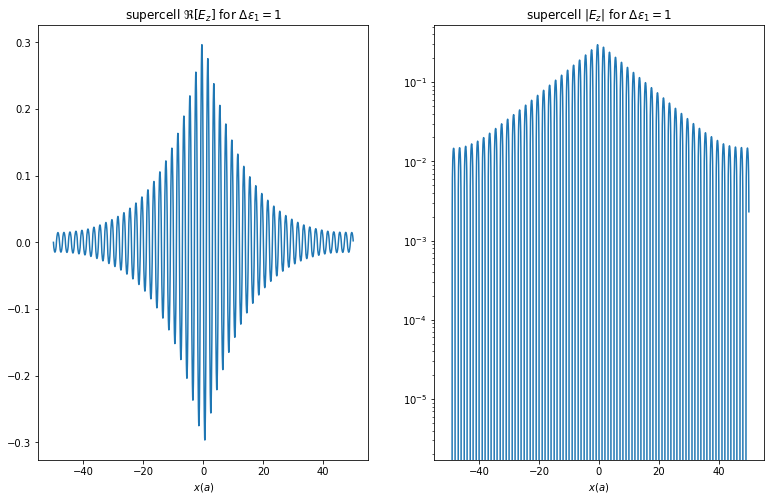

In [11]:
# get the Ez field of band N+1, which should be the mode in the gap for deps1 > 0
ez = sc.get_efield(N+1)[:,0,0,2]

x = np.linspace(-N/2, N/2, N*sc.resolution[0])

# for fun, we'll plot on both a linear and a log scale
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.plot(x, np.real(ez))
plt.title("supercell $\Re[E_z]$ for $\Delta\epsilon_1 = 1$")
plt.xlabel("$x (a)$")
plt.subplot(1,2,2)
plt.semilogy(x, np.real(ez))
plt.title("supercell $|E_z|$ for $\Delta\epsilon_1 = 1$")
plt.xlabel("$x (a)$")

### part (b) continued

Now, to do the same thing but for $\Delta\varepsilon_2 = 1$, we'll modify the `supercell1` function, defining an analogous `supercell2` function, to create a defect in a $\varepsilon_2$ layer.   Basically, we just take `supercell1` and swap the roles of $\varepsilon_1$ and $\varepsilon_2$:

In [12]:
# define a function to create a supercell in the eps2 layer, with some default parameters:
def supercell2(N=15, deps2=0, eps1=12, eps2=1):
    d1 = math.sqrt(eps2) / (math.sqrt(eps1) + math.sqrt(eps2)) # quarter-wave thickness
    d2 = 1 - d1
    return mpb.ModeSolver(                    
        geometry_lattice=mp.Lattice(size=(N,0,0)),
        geometry=mp.geometric_objects_lattice_duplicates(
                    mp.Lattice(size=(N,0,0)),
                    [mp.Block(center=(0,0,0), size=(d2,mp.inf,mp.inf),
                              material=mp.Medium(epsilon=eps2))]) +
                 [mp.Block(center=(0,0,0), size=(d2,mp.inf,mp.inf),
                           material=mp.Medium(epsilon=eps2+deps2))],
        default_material=mp.Medium(epsilon=eps1),
        k_points=[mp.Vector3(0)],
        resolution=32, # this is plenty for the first few bands
        num_bands=N+1,
        tolerance=1e-12 # reduce tolerance to get "tails" more accurately
        )

In [13]:
sc2 = supercell2(N=N, deps2=1)
sc2.run_tm(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 101 bands with 1e-12 tolerance
Working in 1 dimensions.
Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          

Fixing e-field (band 18) phase by 0.671386 + -0.741108i; max ampl. = 0.0762679
Fixing e-field (band 19) phase by 0.679762 + -0.733433i; max ampl. = 0.076323
Fixing e-field (band 20) phase by 0.767458 + 0.641099i; max ampl. = 0.074621
Fixing e-field (band 21) phase by -0.642026 + 0.766683i; max ampl. = 0.0764493
Fixing e-field (band 22) phase by 0.382582 + -0.923922i; max ampl. = 0.0764369
Fixing e-field (band 23) phase by -0.996924 + 0.0783779i; max ampl. = 0.0765129
Fixing e-field (band 24) phase by -0.18314 + 0.983087i; max ampl. = 0.0765812
Fixing e-field (band 25) phase by -0.684386 + -0.72912i; max ampl. = 0.0765477
Fixing e-field (band 26) phase by -0.273209 + 0.961955i; max ampl. = 0.076678
Fixing e-field (band 27) phase by -0.872671 + 0.488308i; max ampl. = 0.0767426
Fixing e-field (band 28) phase by 0.688653 + 0.725091i; max ampl. = 0.0768396
Fixing e-field (band 29) phase by -0.906677 + -0.421825i; max ampl. = 0.076909
Fixing e-field (band 30) phase by -0.195009 + -0.980802i;

Text(0.5, 0, '$x (a)$')

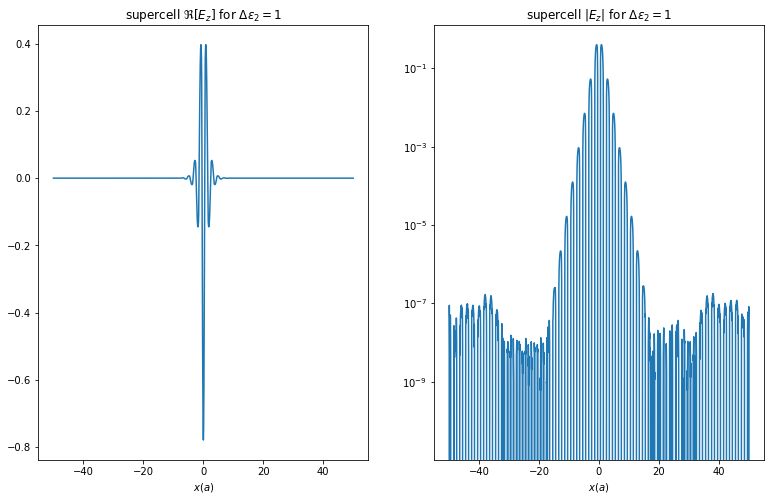

In [14]:
# get the Ez field of band N+1, which should be the mode in the gap for deps1 > 0
ez2 = sc2.get_efield(N+1)[:,0,0,2]

x = np.linspace(-N/2, N/2, N*sc2.resolution[0])

# for fun, we'll plot on both a linear and a log scale
plt.figure(figsize=(13,8))
plt.subplot(1,2,1)
plt.plot(x, np.real(ez2))
plt.title("supercell $\Re[E_z]$ for $\Delta\epsilon_2 = 1$")
plt.xlabel("$x (a)$")
plt.subplot(1,2,2)
plt.semilogy(x, np.real(ez2))
plt.title("supercell $|E_z|$ for $\Delta\epsilon_2 = 1$")
plt.xlabel("$x (a)$")

As desired, both the $\Delta\varepsilon_1$ and $\Delta\varepsilon_2$ defects "pulled" an eigenvalue down into the gap, creating a "bound" or "cavity" mode solution that is *exponentially* localized.   (In the $\Delta\varepsilon_2$ case, the exponential tails turn into numerical noise once they get sufficiently small, since MPB only computes the eigenvalues to a certain accuracy and the tails have exponentially small effect on $\omega$.)

To compare the symmetry of the two modes, we should plot them next to one another in a smaller $x$ range:

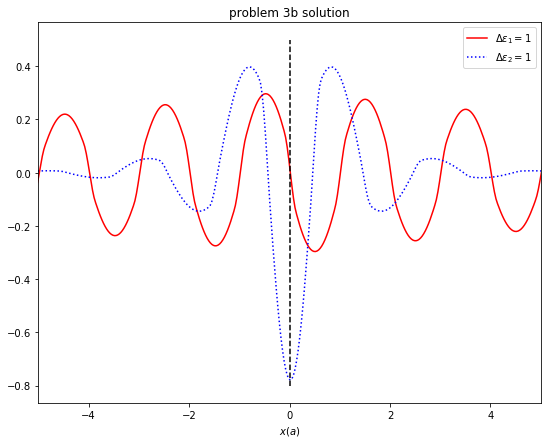

In [15]:
x = np.linspace(-N/2, N/2, N*sc2.resolution[0])

plt.figure(figsize=(9,7))
plt.plot(x, np.real(ez), "r-")
plt.plot(x, np.real(ez2), "b:")
plt.title("problem 3b solution")
plt.xlabel("$x (a)$")
plt.legend(["$\Delta\epsilon_1 = 1$", "$\Delta\epsilon_2 = 1$"])
plt.xlim(-5,5)
plt.plot([0,0], [-0.8,0.5], "k--")

How do we understand the symmetry here?   In both cases, the $\varepsilon(x)$ function is mirror-symmetric around the defect, so we *expect even/odd solutions*.  But which one?

We are "pulling" down a mode from the *top* of the gap, and we saw in class (via perturbation theory) the band-edge mode at the *top* of the gap has an $E_z$ field that is *odd* in the $\varepsilon_1=12$ layer and *even* in the $\varepsilon_1=1$ layer.

Therefore, we expect the $\Delta\varepsilon_1$ defect mode to be *odd* around its center (= center of $\varepsilon_1$ layer), and the $\Delta\varepsilon_2$ mode should conversely be even around its center (= center of $\varepsilon_2$ layer), just like the band-edge mode it comes from.  This is exactly what we see in the plot above!

The fact that the $\Delta\varepsilon_1$ case has a node right in the middle of the defect layer also means that its $|E_z|$ field is smaller in the defect.  From perturbation theory, this means that the $\Delta\varepsilon_1$ defect has a *smaller effect* than the $\Delta\varepsilon_2$ defect: the $\Delta\varepsilon_1$ defect doesn't "push" the mode as far into the gap, resulting in the **dramatically weaker confinement** apparent in the plots above.

### part (c)

Gradually increase the $\varepsilon$ of a single $\varepsilon_{2}$ layer, and plot the defect $\omega$ as a function of $\Delta\varepsilon_2$ as the frequency sweeps across the gap. At what $\Delta\varepsilon_2$ do you get two defect modes in the gap? Plot the $E_{z}$ of the second defect mode.

Be careful to increase the size of the supercell for modes near the edge of the gap, which are only weakly localized.  We will need to increase `num_bands` by 1 in order to see a second mode in the gap (if any).

We will just write a loop using our `supercell2` function, scanning from $\Delta\varepsilon_2 = 0$ to $30$.

In [21]:
# our array of Δε₂ values from 0 to 30;
# we put some more data points near Δε₂=0 for a nicer plot
deps2s = np.concatenate([np.linspace(0, 5, 20), np.linspace(5 + 5/20, 30, 30)])

# frequencies of the first and second modes
freq1 = []
freq2 = []

# estimated decay rates, for the next problem
kappas = []

N=100
x = N/2 + 5

for deps2 in deps2s:
    s = supercell2(N=N, deps2=deps2)
    s.num_bands=N+2
    s.run_tm()
    ez = s.get_efield(N+1)[:,0,0,2]
    kappa = math.log(np.abs(ez[int(x*s.resolution[0])]/ez[int((x+1)*s.resolution[0])]))
    kappas = kappas + [kappa]
    freq1 = freq1 + [s.all_freqs[-1,-2]]
    freq2 = freq2 + [s.all_freqs[-1,-1]]

Initializing eigensolver data
Computing 102 bands with 1e-12 tolerance
Working in 1 dimensions.
Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

     block, center = (-34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (21,0,0)
          size (0.7

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.3128952980041504
solve_kpoint (0,0,0):
tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, t

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1

Finished solving for bands 2 to 12 after 43 iterations.
Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 31 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 54 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 43 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 72 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 52 iterations.
Solving for bands 68 to 78...
    iteration   91: trace = 0.3408508237716155 (1.23942e-08% change)
Finished solving for bands 68 to 78 after 100 iterations.
Solving for bands 79 to 89...
Finished solving for bands 79 to 89 after 79 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 14 iterations.
Solving for bands 101 to 102...
    iteration  203: trace = 0.3472946877800838 (1.40092e-09% change)
Finished solving for bands 101 to 102 after 237 iterations.
Finished k-poin

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.0053568, 0.00537258, 0.0107121, 0.0107435, 0.0160642, 0.0161112, 0.0214116, 0.0214739, 0.0267528, 0.02683, 0.032086, 0.0321777, 0.0374096, 0.0375153, 0.0427219, 0.042841, 0.048021, 0.0481528, 0.053305, 0.0534489, 0.0585721, 0.0587271, 0.06382, 0.0639854, 0.0690468, 0.0692215, 0.07425, 0.074433, 0.0794272, 0.0796174, 0.0845758, 0.084772, 0.089693, 0.0898941, 0.0947759, 0.0949806, 0.0998213, 0.100028, 0.104826, 0.105033, 0.109786, 0.109993, 0.114697, 0.114902, 0.119555, 0.119757, 0.124356, 0.124552, 0.129095, 0.129284, 0.133765, 0.133946, 0.138362, 0.138533, 0.142879, 0.143038, 0.147309, 0.147455, 0.151644, 0.151776, 0.155877, 0.155992, 0.159999, 0.160097, 0.164001, 0.164079, 0.167873, 0.167931, 0.171604, 0.17164, 0.175183, 0.175196, 0.178588, 0.178597, 0.181803, 0.181835, 0.184828, 0.184884, 0.18765, 0.18773, 0.190257, 0.190359, 0.192634, 0.192758, 0.19477, 0.194914, 0.196653, 0.196812, 0.19827, 0.198442, 0.199613, 0.199793, 0.200675, 0.200854, 0.201455, 0.

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-20,0,0)
          

Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (44,0,0)
          size (0.775991,1

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-31,0,0)
          size (0.775991,1e+20,1e+20)
          

     block, center = (41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

     block, center = (-34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.3348968029022217
sol

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.7

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1

Finished solving for bands 2 to 12 after 40 iterations.
Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 34 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 59 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 40 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 64 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 45 iterations.
Solving for bands 68 to 78...
Finished solving for bands 68 to 78 after 86 iterations.
Solving for bands 79 to 89...
    iteration   87: trace = 0.4036405390934744 (1.52844e-09% change)
Finished solving for bands 79 to 89 after 92 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 16 iterations.
Solving for bands 101 to 102...
Finished solving for bands 101 to 102 after 70 iterations.
Finished k-point with 52.7059 mean iterations/band.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.0053

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-11,0,0)
          size (0

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00531934, 0.00537257, 0.0106375, 0.0107435, 0.0159532, 0.016111, 0.0212653, 0.0214734, 0.0265725, 0.026829, 0.0318733, 0.032176, 0.0371663, 0.0375127, 0.04245, 0.042837, 0.0477227, 0.0481472, 0.0529827, 0.0534411, 0.0582281, 0.0587167, 0.0634568, 0.0639718, 0.0686667, 0.069204, 0.0738555, 0.074411, 0.0790207, 0.0795901, 0.0841597, 0.0847386, 0.0892696, 0.0898537, 0.0943473, 0.0949321, 0.0993897, 0.0999705, 0.104393, 0.104966, 0.109354, 0.109913, 0.114268, 0.11481, 0.119131, 0.11965, 0.123939, 0.12443, 0.128686, 0.129144, 0.133366, 0.133788, 0.137974, 0.138354, 0.142504, 0.142837, 0.146948, 0.14723, 0.151299, 0.151525, 0.155548, 0.155715, 0.159689, 0.159792, 0.16371, 0.163747, 0.16757, 0.167601, 0.171252, 0.171353, 0.174783, 0.174953, 0.178151, 0.17839, 0.181347, 0.181651, 0.184358, 0.184722, 0.187174, 0.187591, 0.189784, 0.190242, 0.192174, 0.192662, 0.194335, 0.194838, 0.196255, 0.196755, 0.197924, 0.198402, 0.199331, 0.199766, 0.200469, 0.200838, 0.20132

     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (44,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     b

     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-31,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (32,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-43,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (21,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.34622693061828613
solve_kpoint (0,0,0):
tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm ba

     block, center = (18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1

Finished solving for bands 2 to 12 after 31 iterations.
Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 29 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 46 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 40 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 74 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 56 iterations.
Solving for bands 68 to 78...
    iteration   86: trace = 0.3381922503582513 (2.7405e-10% change)
Finished solving for bands 68 to 78 after 87 iterations.
Solving for bands 79 to 89...
    iteration   82: trace = 0.4028203196589829 (1.7992e-10% change)
Finished solving for bands 79 to 89 after 84 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 19 iterations.
Solving for bands 101 to 102...
Finished solving for bands 101 to 102 after 27 iterations.
Finished k-point wi

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00527056, 0.00537256, 0.0105411, 0.0107434, 0.0158114, 0.0161107, 0.0210812, 0.0214728, 0.0263498, 0.0268277, 0.0316164, 0.0321738, 0.0368797, 0.0375091, 0.0421383, 0.0428316, 0.0473903, 0.0481394, 0.0526337, 0.0534302, 0.0578663, 0.058702, 0.0630859, 0.0639523, 0.0682897, 0.0691788, 0.0734752, 0.0743788, 0.0786395, 0.0795495, 0.0837796, 0.0846882, 0.0888925, 0.0897915, 0.0939747, 0.0948562, 0.0990229, 0.0998787, 0.104033, 0.104855, 0.109002, 0.109782, 0.113925, 0.114653, 0.118798, 0.119466, 0.123615, 0.124215, 0.128372, 0.128894, 0.133064, 0.133499, 0.137683, 0.138024, 0.142225, 0.142462, 0.146681, 0.146809, 0.151045, 0.151059, 0.155206, 0.155308, 0.159243, 0.159462, 0.163165, 0.163497, 0.166965, 0.167404, 0.170635, 0.17117, 0.174167, 0.174786, 0.17755, 0.178238, 0.180773, 0.181515, 0.183825, 0.184602, 0.186691, 0.187487, 0.189358, 0.190154, 0.191811, 0.19259, 0.194037, 0.19478, 0.196021, 0.196711, 0.19775, 0.19837, 0.199211, 0.199745, 0.200395, 0.200826,

     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (44,0,0)
          size (0.775991,1

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-31,0,0)
          size (0.775991,1e+20,1e+20)
          

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.7

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (21,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.33249688148498535
solve_kpoint (0,0,0):
tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm ba

     block, center = (18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)

Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 30 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 48 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 41 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 70 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 58 iterations.
Solving for bands 68 to 78...
Finished solving for bands 68 to 78 after 70 iterations.
Solving for bands 79 to 89...
    iteration   84: trace = 0.4021663576352029 (3.61938e-09% change)
Finished solving for bands 79 to 89 after 94 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 21 iterations.
Solving for bands 101 to 102...
Finished solving for bands 101 to 102 after 18 iterations.
Finished k-point with 50.8235 mean iterations/band.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00521241, 0.00537255, 0.0104277, 0.0107433, 0.0156481, 0.016

     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, cente

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00520288, 0.00537255, 0.0104093, 0.0107433, 0.0156221, 0.0161103, 0.0208428, 0.0214718, 0.0260717, 0.0268259, 0.0313078, 0.0321706, 0.0365491, 0.0375038, 0.041793, 0.0428236, 0.0470365, 0.0481276, 0.0522764, 0.0534136, 0.0575093, 0.0586791, 0.0627321, 0.0639216, 0.0679414, 0.0691381, 0.0731339, 0.0743257, 0.0783063, 0.0794811, 0.0834553, 0.0846009, 0.0885774, 0.0896811, 0.0936692, 0.0947178, 0.0987271, 0.0997063, 0.103747, 0.104642, 0.108726, 0.10952, 0.113658, 0.114335, 0.11854, 0.119083, 0.123366, 0.12376, 0.128133, 0.128363, 0.132833, 0.13289, 0.137342, 0.137461, 0.141718, 0.142011, 0.146019, 0.146476, 0.150244, 0.150849, 0.154387, 0.155121, 0.158442, 0.159283, 0.162401, 0.163327, 0.166252, 0.167243, 0.169983, 0.171019, 0.173581, 0.174645, 0.177034, 0.178108, 0.180326, 0.181396, 0.183444, 0.184495, 0.186372, 0.187392, 0.189096, 0.190071, 0.191602, 0.19252, 0.193873, 0.194723, 0.195898, 0.196667, 0.197662, 0.198338, 0.199152, 0.199724, 0.200359, 0.200814

     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (44,0,0)
          size (0.775991,1

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-31,0,0)
          size (0.775991,1e+20,1e+20)
          

     block, center = (41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

     block, center = (-34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (21,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.3309319019317627
solve_kpoint (0,0,0):
tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm 

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.77

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1

Finished solving for bands 2 to 12 after 37 iterations.
Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 34 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 47 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 41 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 59 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 63 iterations.
Solving for bands 68 to 78...
Finished solving for bands 68 to 78 after 77 iterations.
Solving for bands 79 to 89...
    iteration   83: trace = 0.4017635637010631 (5.35017e-10% change)
Finished solving for bands 79 to 89 after 85 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 30 iterations.
Solving for bands 101 to 102...
Finished solving for bands 101 to 102 after 17 iterations.
Finished k-point with 51.3431 mean iterations/band.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.0051

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-11,0,0)
          size (0

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00512832, 0.00537253, 0.0102678, 0.0107431, 0.0154263, 0.0161099, 0.0206076, 0.0214707, 0.0258108, 0.0268237, 0.0310327, 0.0321667, 0.0362685, 0.0374976, 0.0415131, 0.0428139, 0.0467613, 0.0481131, 0.0520084, 0.0533928, 0.0572502, 0.0586498, 0.0624825, 0.0638811, 0.0677015, 0.0690832, 0.0729037, 0.0742519, 0.0780855, 0.0793829, 0.0832434, 0.0844711, 0.0883741, 0.0895109, 0.0934738, 0.0944961, 0.0985391, 0.0994203, 0.103566, 0.104277, 0.108551, 0.109063, 0.113489, 0.113778, 0.118376, 0.118424, 0.123011, 0.123208, 0.127548, 0.127978, 0.132043, 0.132683, 0.136497, 0.137315, 0.140907, 0.141868, 0.145263, 0.146336, 0.149554, 0.150712, 0.15377, 0.154986, 0.157897, 0.159151, 0.161924, 0.163198, 0.165837, 0.167116, 0.169625, 0.170896, 0.173274, 0.174525, 0.176772, 0.177992, 0.180104, 0.181285, 0.183257, 0.18439, 0.186218, 0.187293, 0.18897, 0.189981, 0.191501, 0.19244, 0.193795, 0.194654, 0.195839, 0.196611, 0.197619, 0.198295, 0.199124, 0.199694, 0.200342, 0.2007

     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (44,0,0)
          size (0.775991,1

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-31,0,0)
          size (0.775991,1e+20,1e+20)
          

     block, center = (41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (33,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

     block, center = (-34,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-35,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-36,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-37,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-38,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-39,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-40,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-41,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-42,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (30,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-45,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (0,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
Geometric object tree has depth 7 and 133 object nodes (vs. 101 actual objects)
Initializing epsilon function...
Allocating fields...
Solving for band polarization: tm.
Initializing fields to random numbers...
1 k-points
  Vector3<0.0, 0.0, 0.0>
elapsed time for initialization: 0.3489077091217041
sol

     block, center = (19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center 

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+

tmfreqs:, k index, k1, k2, k3, kmag/2pi, tm band 1, tm band 2, tm band 3, tm band 4, tm band 5, tm band 6, tm band 7, tm band 8, tm band 9, tm band 10, tm band 11, tm band 12, tm band 13, tm band 14, tm band 15, tm band 16, tm band 17, tm band 18, tm band 19, tm band 20, tm band 21, tm band 22, tm band 23, tm band 24, tm band 25, tm band 26, tm band 27, tm band 28, tm band 29, tm band 30, tm band 31, tm band 32, tm band 33, tm band 34, tm band 35, tm band 36, tm band 37, tm band 38, tm band 39, tm band 40, tm band 41, tm band 42, tm band 43, tm band 44, tm band 45, tm band 46, tm band 47, tm band 48, tm band 49, tm band 50, tm band 51, tm band 52, tm band 53, tm band 54, tm band 55, tm band 56, tm band 57, tm band 58, tm band 59, tm band 60, tm band 61, tm band 62, tm band 63, tm band 64, tm band 65, tm band 66, tm band 67, tm band 68, tm band 69, tm band 70, tm band 71, tm band 72, tm band 73, tm band 74, tm band 75, tm band 76, tm band 77, tm band 78, tm band 79, tm band 80, tm band 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (2,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (1,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1

Finished solving for bands 2 to 12 after 42 iterations.
Solving for bands 13 to 23...
Finished solving for bands 13 to 23 after 34 iterations.
Solving for bands 24 to 34...
Finished solving for bands 24 to 34 after 50 iterations.
Solving for bands 35 to 45...
Finished solving for bands 35 to 45 after 49 iterations.
Solving for bands 46 to 56...
Finished solving for bands 46 to 56 after 59 iterations.
Solving for bands 57 to 67...
Finished solving for bands 57 to 67 after 63 iterations.
Solving for bands 68 to 78...
Finished solving for bands 68 to 78 after 84 iterations.
Solving for bands 79 to 89...
Finished solving for bands 79 to 89 after 77 iterations.
Solving for bands 90 to 100...
Finished solving for bands 90 to 100 after 45 iterations.
Solving for bands 101 to 102...
Finished solving for bands 101 to 102 after 18 iterations.
Finished k-point with 54.598 mean iterations/band.
tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00505678, 0.00537251, 0.0101364, 0.010743, 0.0152531, 0.0161094, 0.0204101

     block, center = (-3,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-4,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-5,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-6,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-7,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-8,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-9,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-10,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, cente

tmfreqs:, 1, 0, 0, 0, 0, 0, 0.00504805, 0.00537251, 0.0101207, 0.010743, 0.015233, 0.0161094, 0.0203879, 0.0214695, 0.0255802, 0.0268212, 0.0308016, 0.0321623, 0.0360429, 0.0374901, 0.0412963, 0.0428021, 0.0465547, 0.0480954, 0.0518125, 0.0533666, 0.0570647, 0.058612, 0.0623069, 0.0638274, 0.067535, 0.0690075, 0.0727456, 0.0741462, 0.077935, 0.0792361, 0.0830997, 0.0842686, 0.0882364, 0.0892337, 0.0933416, 0.0941223, 0.0984115, 0.0989289, 0.103443, 0.103657, 0.108324, 0.108431, 0.112953, 0.113372, 0.117566, 0.118261, 0.122173, 0.123094, 0.12677, 0.127865, 0.131345, 0.13257, 0.135885, 0.137201, 0.140375, 0.141754, 0.144804, 0.14622, 0.149159, 0.150593, 0.153428, 0.154864, 0.157602, 0.159025, 0.161668, 0.163067, 0.165615, 0.166979, 0.169432, 0.170752, 0.173108, 0.174375, 0.176628, 0.177835, 0.179981, 0.18112, 0.183153, 0.184219, 0.18613, 0.187117, 0.188898, 0.189802, 0.191442, 0.192261, 0.193749, 0.19448, 0.195804, 0.196447, 0.197594, 0.19815, 0.199106, 0.199576, 0.200331, 0.200713, 0.20

     block, center = (-11,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-12,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-13,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-14,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-15,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-16,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-17,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-18,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-19,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block

Finally, let's plot the results, superimposing the band gap:

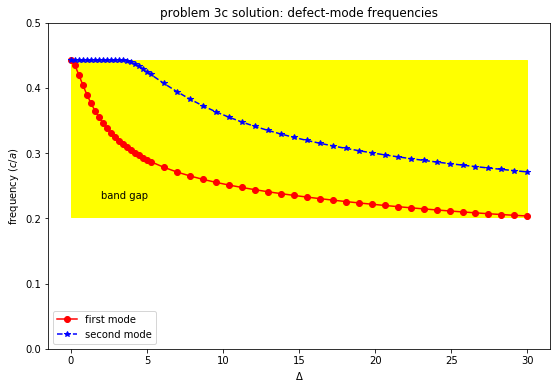

In [22]:
plt.figure(figsize=(9,6))
plt.plot(deps2s, freq1, "ro-")
plt.plot(deps2s, freq2, "b*--")
plt.xlabel("$\Delta\varepsilon_2$")
plt.ylabel("frequency $(c/a)$")
plt.title("problem 3c solution: defect-mode frequencies")
plt.fill([0,30,30,0], [freqs_qw[-1,0],freqs_qw[-1,0],freqs_qw[-1,1],freqs_qw[-1,1]], color="yellow")
plt.ylim(0,0.5)
plt.text(2,0.23,"band gap")
plt.legend(["first mode", "second mode"])

The above figure shows ω as a function of ∆ε of the first two defect modes, where the second defect mode appears in the gap at $\Delta\varepsilon_2 \approx 4.8$. As it turned out, I needed to go to larger values of ∆ε, all the way to ∆ε = 30, in order for the first defect mode to reach the lower edge of the gap.

Below, we plot the $E_z$ field of the first and second defect modes at $\Delta\varepsilon_2 = 10$:

In [23]:
s = supercell2(N=N, deps2=10)
s.num_bands=N+2
s.run_tm(mpb.fix_efield_phase)

Initializing eigensolver data
Computing 102 bands with 1e-12 tolerance
Working in 1 dimensions.
Grid size is 3200 x 1 x 1.
Solving for 11 bands at a time.
Creating Maxwell data...
Mesh size is 3.
Lattice vectors:
     (100, 0, 0)
     (0, 1, 0)
     (0, 0, 1)
Cell volume = 100
Reciprocal lattice vectors (/ 2 pi):
     (0.01, -0, 0)
     (-0, 1, -0)
     (0, -0, 1)
Geometric objects:
     block, center = (50,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (49,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (48,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (47,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (46,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (45,0,0)
          size (0.775991,1e+20,1e+20)
 

          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-22,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-23,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-24,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-25,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-26,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-27,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-28,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-29,0,0)
          size (0.775991,1e+20,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
     block, center = (-30,0,0)
          size (0.775991,1e+20,1e+20)
          

Fixing e-field (band 18) phase by -0.998635 + -0.0522305i; max ampl. = 0.0758177
Fixing e-field (band 19) phase by 0.144047 + 0.989571i; max ampl. = 0.0762897
Fixing e-field (band 20) phase by 0.469313 + 0.883032i; max ampl. = 0.0760319
Fixing e-field (band 21) phase by -0.834032 + -0.551716i; max ampl. = 0.0763962
Fixing e-field (band 22) phase by -0.702731 + 0.711456i; max ampl. = 0.0761875
Fixing e-field (band 23) phase by -0.478428 + 0.878127i; max ampl. = 0.0764623
Fixing e-field (band 24) phase by -0.985548 + 0.169395i; max ampl. = 0.0763234
Fixing e-field (band 25) phase by 0.995907 + 0.0903795i; max ampl. = 0.0765058
Fixing e-field (band 26) phase by 0.939891 + -0.341476i; max ampl. = 0.076489
Fixing e-field (band 27) phase by -0.226568 + -0.973995i; max ampl. = 0.0766601
Fixing e-field (band 28) phase by 0.978862 + 0.204522i; max ampl. = 0.0766768
Fixing e-field (band 29) phase by 0.278924 + 0.960313i; max ampl. = 0.0767834
Fixing e-field (band 30) phase by -0.37815 + 0.925745

Text(0, 0.5, '$E_z$ (normalized)')

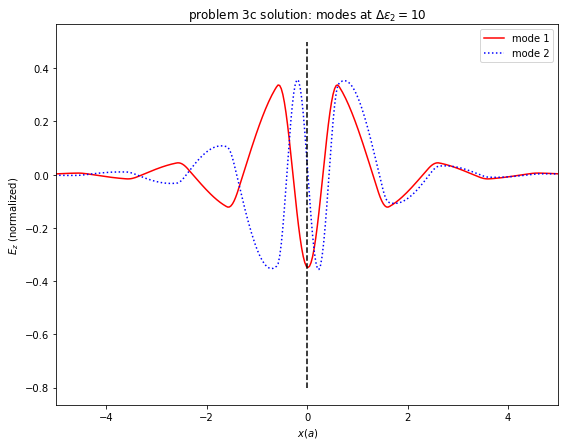

In [24]:
ez1 = s.get_efield(N+1)[:,0,0,2]
ez2 = s.get_efield(N+2)[:,0,0,2]

x = np.linspace(-N/2, N/2, N*s.resolution[0])

plt.figure(figsize=(9,7))
plt.plot(x, np.real(ez1), "r-")
plt.plot(x, np.real(ez2), "b:")
plt.title("problem 3c solution: modes at $\Delta\epsilon_2 = 10$")
plt.xlabel("$x (a)$")
plt.legend(["mode 1", "mode 2"])
plt.xlim(-5,5)
plt.plot([0,0], [-0.8,0.5], "k--")
plt.ylabel("$E_z$ (normalized)")

As can be seen from the above plot, the new mode introduced by this large $\Delta\varepsilon_2=10$ is indeed localized and orthogonal to the first mode (odd where the first mode is even).

### part (d)

The mode must decay exponentially far from the defect (multiplied by an $e^{i\frac{\pi}{a}x}$ sign oscillation and the periodic Bloch envelope, of course). From the $E_{z}$ field computed by MPB, extract this asympotic exponential decay rate (i.e. $\kappa$ if the field decays $\sim e^{-\kappa x}$) and plot this rate as a function of $\omega$, for the first defect mode, as you increase $\varepsilon_{2}$ as above (vary $\varepsilon_{2}$ so that $\omega$ goes from the top of the gap to the bottom).

The supercell size $N=100$ from above is more than sufficient for our purposes.  As seen in the first part of the problem, the rapid decay of the modes means that looking at about $x = 10a$ seems like it should give us a good estimate of the decay rate.  (Looking at much larger $x$ than this risks going into the "noise floor" of the mode that we saw in the first part.)

We will use the estimate $$\kappa \approx \log|E_z(x)/E_z(x+a)|$$ for $x = 5a$.  From our Python `ez` array, we can compute `kappa = math.log(np.abs(ez[x*resolution]/ez[(x+1)*resolution]))` for `x = N/2 + 5`.   This is implemented in the code for the previous part of the problem above.

(0, 1.3)

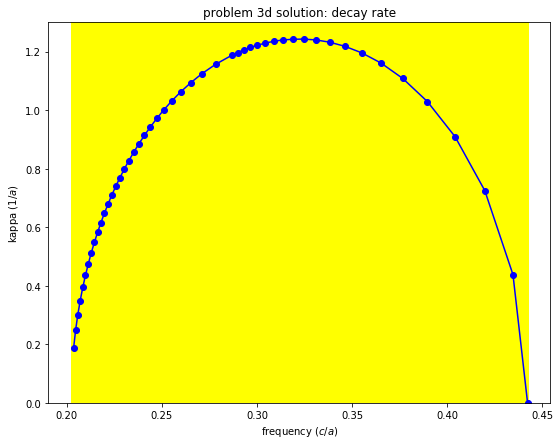

In [26]:
plt.figure(figsize=(9,7))
plt.plot(freq1, kappas, "bo-")
plt.xlabel("frequency $(c/a)$")
plt.ylabel("kappa $(1/a)$")
plt.title("problem 3d solution: decay rate")

plt.fill([freqs_qw[-1,0],freqs_qw[-1,0],freqs_qw[-1,1],freqs_qw[-1,1]], [0, 1.3, 1.3, 0], color="yellow")
plt.ylim(0,1.3)

The resulting $\kappa(\omega)$ is plotted in above. Just as we predicted in class, it increases as $\sqrt{\Delta\omega}$ (i.e. in a sideways parabola) away from the gap edges, and peaks in the center of the gap! 

(The fact that it turns out to peak exactly at the center of the gap is a special property of the quarter-wave stack, and is not true in general for photonic crystals.)